## Lasso Regression from Scratch

 There are many variable selection methods including best subset selection, stepwise regression, Lasso regression. The most famous method is Lasso Regression. Lasso Regression also regularizes linear regression models adding L1 penalty term.
 The objective(loss) function of multiple linear regression is

\begin{equation*}
f(x)=\frac{1}{2}\Vert y-X\beta\Vert_2^2
\end{equation*}

$\hat{\beta}=\underset{\beta \in R^{n\times1}}{\operatorname{argmin}}\frac{1}{2}\Vert y-X\beta\Vert_2^2=(X^TX)^{-1}X^Ty$ minimizes the above function, $f(X)$. Adding L1 penalty term, the objective function is

\begin{equation*}
f(x)=\frac{1}{2}\Vert y-X\beta\Vert_2^2 + \lambda\vert\beta\vert
\end{equation*}

How about this? Solving this function with closed forms is impossible since the regularization term is not differentiable with respect to $\beta$.

So we need to apply some algorithms for getting $\hat{\beta}$.

(If the regularization term is L2, the solution is closed form, and it's called Ridge regression. BUT, we will focus on Lasso in this post)

There are four algorithms for solving LASSO. There are, Proximal Gradient Descent, Accelerated Proximal Gradient Descent, Alternating Direction Method of Multipliers, and Coordinate Descent.

We will see how they converge and compute $\hat{\beta}$.

### Proximal Gradient Descent

### Accelerated Proximal Gradient Descent1

### Alternating Direction Method of Multipliers

### Coordinate Descent

In [1]:
from fit import *
from sklearn import datasets
import pandas as pd
# import matplotlib.pyplot as plt

# Load Diabetes Dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1,1)

n,k = X.shape
beta = np.ones((k,1))

lamda = 10
iter_num = 100
rho = 100

# Train Lasso Models
proximal_descent = proximal(X, y, 0.5, 100)
acc_proximal_descent1 = acc_proximal1(X, y, 0.5, 100)
acc_proximal_descent2 = acc_proximal2(X, y, 0.5, 100)
admm_descent = admm(X, y, 0.5, 100, 100)
coordinate_descent = coordinate(X, y, 0.5, 100)


### Accelerated Proximal Gradient Descent1
### Accelerated Proximal Gradient Descent2
### Alternating Direction Method of Multipliers

### Coordinate Descent

In [2]:
loss_df = {'Proximal': proximal_descent.loss,'Accerlated Proximal1': acc_proximal_descent1.loss,
           'Accerlated Proximal2': acc_proximal_descent2.loss,'ADMM': admm_descent.loss,
           'Coordinate': coordinate_descent.loss, 'iteration': [x for x in range(1,iter_num+1)]}
loss_df = pd.DataFrame(loss_df).set_index('iteration')

<AxesSubplot:xlabel='iteration'>

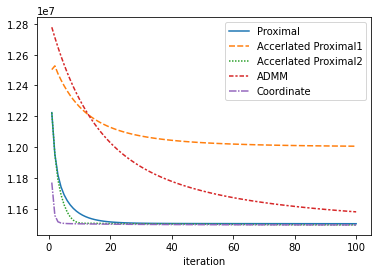

In [3]:
import seaborn as sns
sns.lineplot(data=loss_df)